In [114]:
## source: https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca/PCA.ipynb

In [11]:
import pandas as pd 
import numpy as np
data=[[1200,1,0,0,2,'Skinny'], 
      [2800,1,1,1,1,'Normal'],
      [3500,2,2,1,0,'Fat'],
      [1400,0,1,0,3,'Skinny'],
      [5000,2,2,2,0,'Fat'],
      [1300,0,0,1,2,'Skinny'],
      [3000,1,0,1,1,'Normal'],
      [4000,2,2,2,0,'Fat'],
      [2600,0,2,0,0,'Normal'],
      [3000,1,2,1,1,'Fat']
     ]
df=pd.DataFrame(data, columns=['calory',
                        'breakfast','lunch','dinner',
                        'exercise','body_shape'])

In [4]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


## Split feature vector and labels

In [5]:
X = df[['calory','breakfast','lunch','dinner','exercise']]
Y = df[['body_shape']]

## Rescale feature vectors to all have the same scale

In [6]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(X)

In [9]:
x_std[:,0]

array([-1.35205803,  0.01711466,  0.61612771, -1.18091145,  1.89972711,
       -1.26648474,  0.18826125,  1.04399418, -0.15403193,  0.18826125])

In [12]:
np.(x_std[:,0])

1.3877787807814457e-17

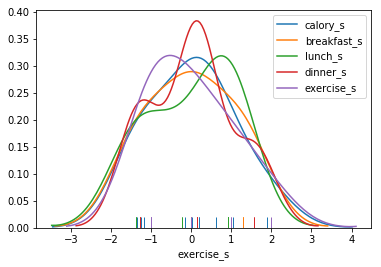

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

df1 = pd.DataFrame(x_std,columns=['calory_s','breakfast_s','lunch_s','dinner_s','exercise_s'])
sns.distplot(df1['calory_s'],hist=False, rug=True, label='calory_s')
sns.distplot(df1['breakfast_s'],hist=False, rug=True, label='breakfast_s')
sns.distplot(df1['lunch_s'],hist=False, rug=True, label='lunch_s')
sns.distplot(df1['dinner_s'],hist=False, rug=True, label='dinner_s')
sns.distplot(df1['exercise_s'],hist=False, rug=True, label='exercise_s')


## Covariance Matrix of Feature Vectors 

In [106]:
import numpy as np

features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


## Eigen Vectors and Eigen Values from Covariance Matrix

In [107]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [108]:
eig_vals[0] / sum(eig_vals)

0.7318321731427544

## Project data point onto selected Eigen Vector

In [109]:
projected_X = x_std.dot(eig_vecs.T[0])
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [111]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


Text(0.5,1,'PCA result')

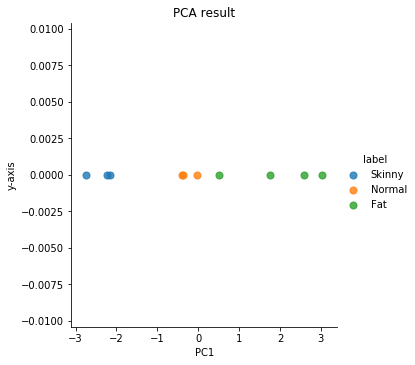

In [112]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')

## Scikit learn 

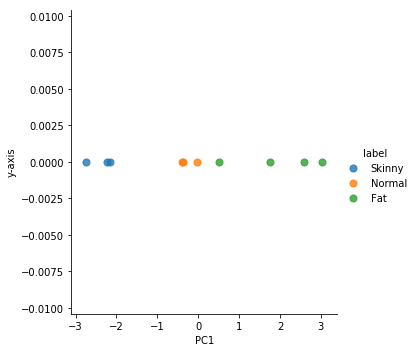

In [113]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color